In [643]:
### IMPORTS ###
import os
import struct
import numpy as np
import math
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider, fixed
import ipywidgets as widgets

In [644]:
### SETTINGS ###
np.set_printoptions(precision=3, suppress=True, threshold=np.inf)

In [641]:
### FOLDER SETTINGS ###
input_folder = "../output/"

u_solution_path = input_folder + "/u_solution.dat"
v_solution_path = input_folder + "/v_solution.dat"
p_solution_path = input_folder + "/p_solution.dat"

In [642]:
format_string = '<d'  # '<d' for little-endian, '>d' for big-endian

In [645]:
with open(u_solution_path, 'rb') as f:
    data = np.fromfile(f, dtype=np.float64)
    u_approximate_solution = data

with open(v_solution_path, 'rb') as f:
    data = np.fromfile(f, dtype=np.float64)
    v_approximate_solution = data

with open(p_solution_path, 'rb') as f:
    data = np.fromfile(f, dtype=np.float64)
    p_approximate_solution = data

u_approximate_solution = np.array(u_approximate_solution)    
v_approximate_solution = np.array(v_approximate_solution)
p_approximate_solution = np.array(p_approximate_solution)

In [648]:
ndims = 2
num_data_per_elements = 1
u_grid_size = int(math.ceil(((u_approximate_solution.size)/num_data_per_elements) ** (1 / ndims)))
v_grid_size = int(math.ceil(((v_approximate_solution.size)/num_data_per_elements) ** (1 / ndims)))
p_grid_size = int(math.ceil(((p_approximate_solution.size)/num_data_per_elements) ** (1 / ndims)))

u_layout = (u_grid_size, u_grid_size, num_data_per_elements)
v_layout = (v_grid_size, v_grid_size, num_data_per_elements)
p_layout = (p_grid_size, p_grid_size, num_data_per_elements)

print("u_layout: ", u_layout)
print("v_layout: ", v_layout)
print("p_layout: ", p_layout)

u_layout:  (32, 32, 1)
v_layout:  (32, 32, 1)
p_layout:  (32, 32, 1)


In [646]:
# Reshape the data into a 2D array
u_approximate_solution = u_approximate_solution.reshape(u_layout)
v_approximate_solution = v_approximate_solution.reshape(v_layout)
p_approximate_solution = p_approximate_solution.reshape(p_layout)

u_approximate_solution = np.squeeze(u_approximate_solution)
v_approximate_solution = np.squeeze(v_approximate_solution)
p_approximate_solution = np.squeeze(p_approximate_solution)

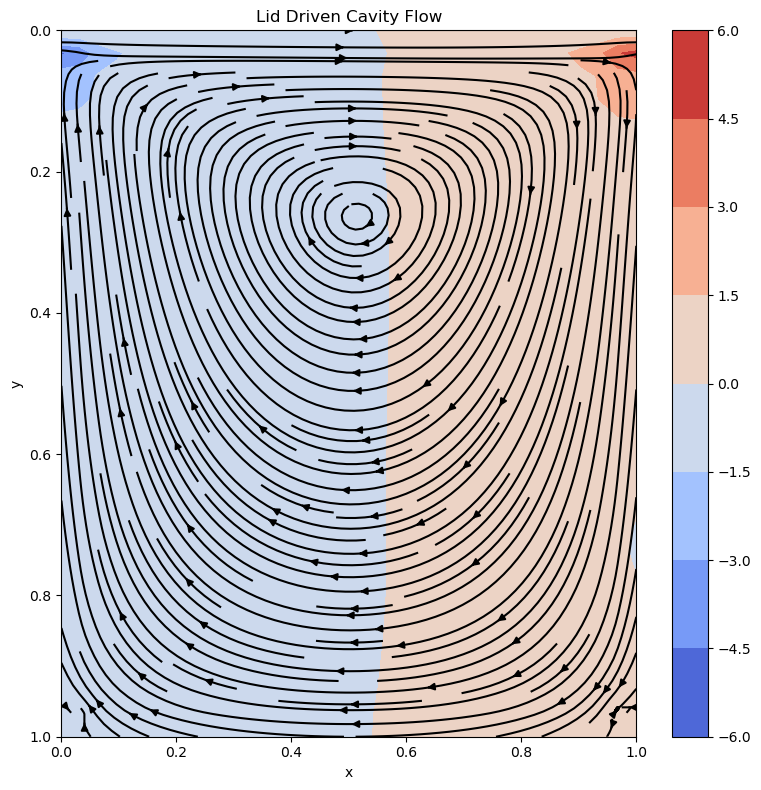

In [647]:
domain_begin_array = np.full(ndims, 0.0)
domain_end_array = np.full(ndims, 1.0)

x = np.linspace(domain_begin_array[0], domain_end_array[0], u_grid_size)
y = np.linspace(domain_begin_array[1], domain_end_array[1], v_grid_size)
X, Y = np.meshgrid(x, y)

plt.figure(figsize=(8, 8))
plt.contourf(X, Y, p_approximate_solution, cmap="coolwarm")
plt.colorbar()
plt.streamplot(X, Y, u_approximate_solution, v_approximate_solution, color='black', density=2)
plt.xlabel("x")
plt.ylabel("y")
# Set axis limits to match the data extents
plt.xlim(X.min(), X.max())
plt.ylim(Y.min(), Y.max())
# Set the aspect of the plot to be equal
#plt.gca().set_aspect('equal', adjustable='box')
# Invert the y-axis to match the data
plt.gca().invert_yaxis()
plt.title("Lid Driven Cavity Flow")

# Make the plot tight
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig("lid_driven_cavity_flow.png", dpi=300)

# Display the plot
plt.show()